<a href="https://colab.research.google.com/github/19rehan/ML-Projects/blob/main/simple_lenear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
732,2014,MERCEDES-BENZ,CL 550 4MATIC,COMPACT,4.7,8,AS7,Z,15.4,10.4,13.2,21,304
283,2014,CHRYSLER,300 (MDS),FULL-SIZE,5.7,8,A5,X,15.8,9.2,12.8,22,294
209,2014,CHEVROLET,EQUINOX AWD,SUV - SMALL,3.6,6,A6,E,19.8,13.6,17.0,17,272
838,2014,NISSAN,ARMADA 4WD,SUV - STANDARD,5.6,8,A5,X,19.1,13.4,16.5,17,380
773,2014,MERCEDES-BENZ,SLK 250,TWO-SEATER,1.8,4,AS7,Z,10.3,7.2,8.9,32,205


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [7]:
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [8]:
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
94,3.0,6,9.6,221
767,4.7,8,12.1,278
61,4.0,8,12.2,281
323,5.7,8,14.4,331
385,3.7,6,13.4,308
186,3.6,6,11.8,271
685,2.0,4,6.3,145
438,5.3,8,21.5,344
947,2.0,4,7.8,179


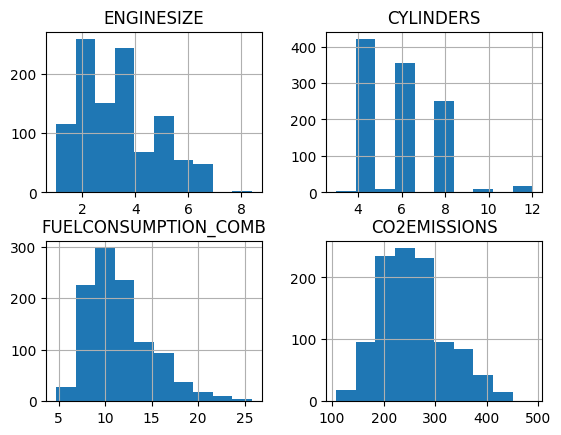

In [9]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

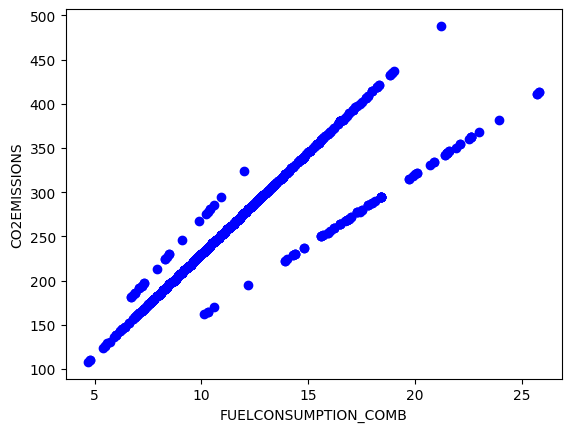

In [10]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS , color = 'blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

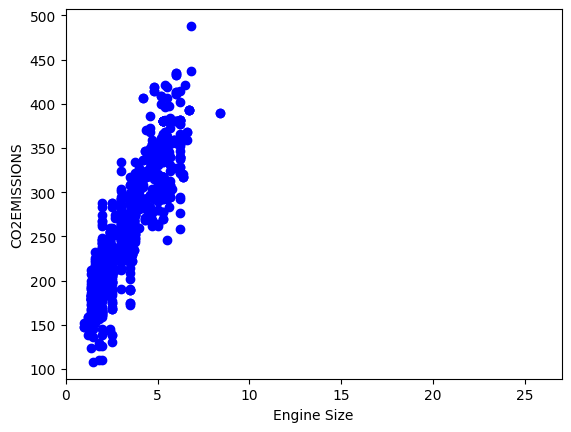

In [11]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS , color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel('CO2EMISSIONS')
plt.xlim(0,27)
plt.show()

In [12]:
x = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [19]:
type(x_train),np.shape(x_train),np.shape(x_train)

(numpy.ndarray, (853,), (853,))

In [21]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(x_train.reshape(-1,1), y_train)

# Print the coefficients
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

Coefficients:  38.992978724434074
Intercept:  126.28970217408721


Text(0, 0.5, 'Emission')

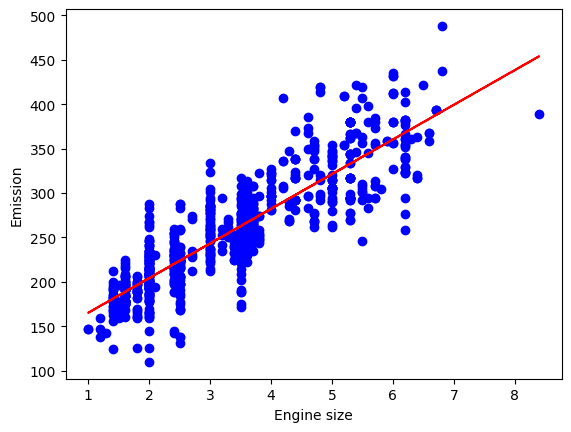

In [23]:
plt.scatter(x_train, y_train,  color='blue')
plt.plot(x_train, regressor.coef_ * x_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict(x_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


Text(0, 0.5, 'Emission')

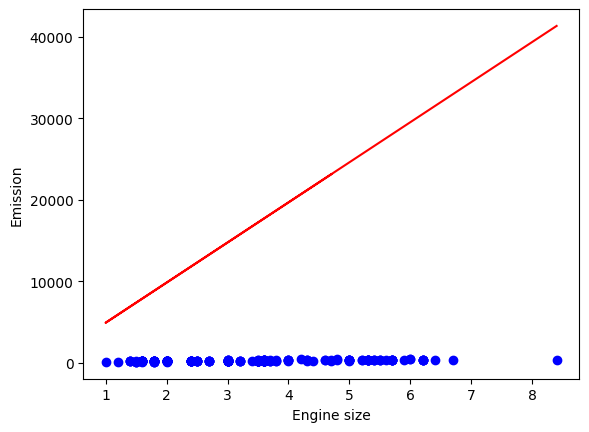

In [30]:
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_test, regressor.coef_ * x_test * regressor.intercept_,'-r')

plt.xlabel("Engine size")
plt.ylabel("Emission")

In [31]:
X =  cdf.FUELCONSUMPTION_COMB.to_numpy()       # ADD CODE

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42 ) #ADD CODE


In [32]:
regr = linear_model.LinearRegression()
regr.fit(X_train.reshape(-1,1),y_train)

#ADD COD
print("Coefficient", regr.coef_[0])
print("Intercept", regr.intercept_)

Coefficient 16.180900781199195
Intercept 69.10302617988444


In [33]:
y_test_ = regr.predict(X_test.reshape(-1,1))

In [34]:
print("Mean Squared Error %.2f" % mean_squared_error(y_test, y_test))

Mean Squared Error 0.00
